In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c3affa3a87233c87ee64c3e16db78ba240c0bdd2f5b87f0d4c422f9de1c15553
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


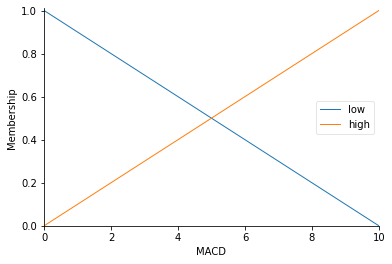

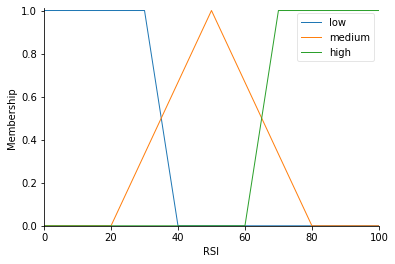

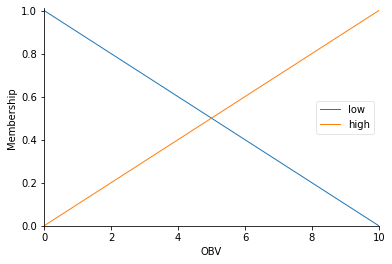

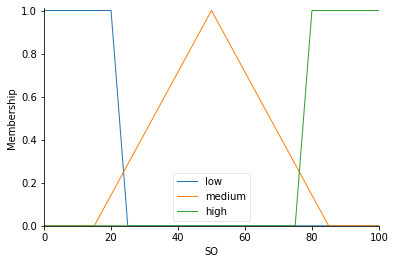

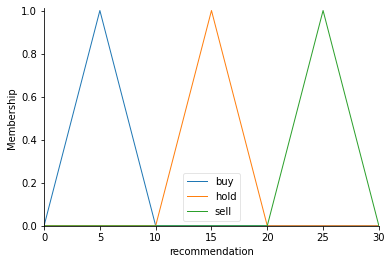

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
#input variable 
MACD = ctrl.Antecedent(np.arange(0,11,1),'MACD')
RSI = ctrl.Antecedent(np.arange(0,101,1),'RSI')
OBV = ctrl.Antecedent(np.arange(0,11,1),'OBV')
SO = ctrl.Antecedent(np.arange(0,101,1),'SO')
#output need to predict
recommendation = ctrl.Consequent(np.arange(0,31,1),'recommendation')

MACD['low'] = fuzz.trimf(MACD.universe,[0,0,10])
MACD['high'] = fuzz.trimf(MACD.universe,[0,10,10])
MACD.view()

RSI['low'] = fuzz.trapmf(RSI.universe,[0,0,30,40])
RSI['medium'] = fuzz.trimf(RSI.universe,[20,50,80])
RSI['high'] = fuzz.trapmf(RSI.universe,[60,70,100,100])
RSI.view()

OBV['low'] = fuzz.trimf(OBV.universe,[0,0,10])
OBV['high'] = fuzz.trimf(OBV.universe,[0,10,10])
OBV.view()


SO['low'] = fuzz.trapmf(SO.universe,[0,0,20,25])
SO['medium'] = fuzz.trimf(SO.universe,[15,50,85])
SO['high'] = fuzz.trapmf(SO.universe,[75,80,100,100])
SO.view()

recommendation['buy'] = fuzz.trimf(recommendation.universe,[0,5,10])
recommendation['hold'] = fuzz.trimf(recommendation.universe,[10,15,20])
recommendation['sell'] = fuzz.trimf(recommendation.universe,[20,25,30])
recommendation.view()

In [ ]:
rule1 = ctrl.Rule(MACD['low'] & RSI['low'] & SO['low'] & OBV['high'], recommendation['buy'])
rule2 = ctrl.Rule(MACD['low'] & RSI['high'] & SO['high'] & OBV['low'], recommendation['buy'])
rule3 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['medium'] & OBV['high'], recommendation['buy'])
rule4 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['high'] & OBV['low'], recommendation['sell'])
rule5 = ctrl.Rule(RSI['low'] & SO['low'] & OBV['high'], recommendation['buy'])
rule6 = ctrl.Rule(RSI['high'] & SO['high'] & OBV['low'], recommendation['sell'])
rule7 = ctrl.Rule(MACD['low'] & RSI['high'] & SO['high'], recommendation['sell'])
rule8 = ctrl.Rule(MACD['low'] & RSI['medium'] & SO['medium'], recommendation['hold'])
rule9 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['medium'] & OBV['low'], recommendation['hold'])


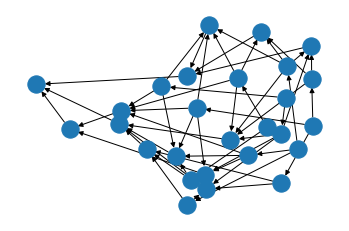

In [ ]:
recommendation_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
recommendation_ctrl.view()


5.0


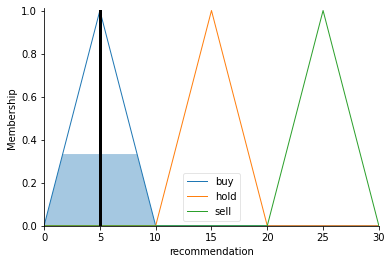

In [ ]:
recommendation_fis = ctrl.ControlSystemSimulation(recommendation_ctrl)
recommendation_fis.input['MACD'] = 10
recommendation_fis.input['RSI'] = 70
recommendation_fis.input['SO'] = 60
recommendation_fis.input['OBV'] = 10
recommendation_fis.compute()
print(recommendation_fis.output['recommendation'])
recommendation.view(sim = recommendation_fis)